<a href="https://colab.research.google.com/github/marleyabe/Regress-o-Linear-Multipla/blob/main/Trabalho%20Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import skew, kurtosis, pearsonr
import numpy as np

In [86]:
pd.set_option('display.float_format', '{:.2f}'.format)

# Importação dos Dados

In [87]:
df = pd.read_csv('/content/br_sp_gov_ssp_ocorrencias_registradas.csv', sep=',')

In [88]:
df.head()

,ano,mes,id_municipio,regiao_ssp,homicidio_doloso,numero_de_vitimas_em_homicidio_doloso,homicidio_doloso_por_acidente_de_transito,numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,homicidio_culposo_por_acidente_de_transito,homicidio_culposo_outros,...,total_de_estupro,estupro,estupro_de_vulneravel,total_de_roubo_outros,roubo_outros,roubo_de_veiculo,roubo_a_banco,roubo_de_carga,furto_outros,furto_de_veiculo
0,2002,1,3500105,Presidente Prudente,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,21.00,0.00
1,2002,2,3500105,Presidente Prudente,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,32.00,0.00
2,2002,3,3500105,Presidente Prudente,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,NaN,0.00,NaN,0.00,0.00,0.00,36.00,0.00
3,2002,4,3500105,Presidente Prudente,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,NaN,1.00,NaN,0.00,0.00,0.00,45.00,0.00
4,2002,5,3500105,Presidente Prudente,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,NaN,NaN,1.00,NaN,0.00,0.00,0.00,35.00,0.00


# Tratamento de Dados

In [89]:
df["ano"] = df["ano"].astype(str)
df["mes"] = df["mes"].astype(str)
df["id_municipio"] = df["id_municipio"].astype(str)

# Qualidade dos Dados

In [97]:
df['regiao_ssp'].nunique()

12

In [90]:
print(len(df))
round(((df.isna().sum() - len(df)) * -1) / len(df), 2)

153876


,0
ano,1.00
mes,1.00
id_municipio,1.00
regiao_ssp,1.00
homicidio_doloso,0.98
numero_de_vitimas_em_homicidio_doloso,0.98
homicidio_doloso_por_acidente_de_transito,0.93
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito,0.93
homicidio_culposo_por_acidente_de_transito,0.98
homicidio_culposo_outros,0.98


<p>Apesar de alguns dados estarem vazios, com menos de 30% de dados preenchidos, isso quer dizer que o município não teve aquela incidência.</p>

In [91]:
for col in df.columns[4:]:
  print(f"{col} : {df[col].min()}, {df[col].max()}")

homicidio_doloso : 0.0, 474.0
numero_de_vitimas_em_homicidio_doloso : 0.0, 499.0
homicidio_doloso_por_acidente_de_transito : 0.0, 8.0
numero_de_vitimas_em_homicidio_doloso_por_acidente_de_transito : 0.0, 11.0
homicidio_culposo_por_acidente_de_transito : 0.0, 91.0
homicidio_culposo_outros : 0.0, 33.0
tentativa_de_homicidio : 0.0, 288.0
lesao_corporal_seguida_de_morte : 0.0, 6.0
lesao_corporal_dolosa : 0.0, 4283.0
lesao_corporal_culposa_por_acidente_de_transito : 0.0, 2724.0
lesao_corporal_culposa_outras : 0.0, 254.0
latrocinio : 0.0, 25.0
numero_de_vitimas_em_latrocinio : 0.0, 28.0
total_de_estupro : 0.0, 329.0
estupro : 0.0, 103.0
estupro_de_vulneravel : 0.0, 218.0
total_de_roubo_outros : 0.0, 14927.0
roubo_outros : 0.0, 14337.0
roubo_de_veiculo : 0.0, 5082.0
roubo_a_banco : 0.0, 34.0
roubo_de_carga : 0.0, 655.0
furto_outros : 0.0, 25063.0
furto_de_veiculo : 0.0, 5296.0


<p>O domínio das variáveis parecem ok. Não tem dados negativos ou dados que parecem fugir da realidade.</p>

# EDA

<p>O trabalho propõe escolher algumas variáveis para fazr a análise descritiva. Elas precisam ser divididas em subgrupos, já que não temos faixa etária ou gênero, vamos usar regiao_ssp, que mostra em qual região de São Paulo o municipio está.</p>
<p>As variáveis escolhidas para entrar na análise serão, "roubo_de_veiculo", "roubo_de_carga", "roubo_a_banco"

In [92]:
colunas_selecionadas = ["roubo_de_veiculo", "roubo_de_carga", "roubo_a_banco"]

In [93]:
stats_summary = df[colunas_selecionadas].describe().T

stats_summary["skewness"] = df[colunas_selecionadas].skew()
stats_summary["kurtosis"] = df[colunas_selecionadas].kurtosis()

In [94]:
stats_summary

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
roubo_de_veiculo,151296.00,9.31,126.97,0.00,0.00,0.00,1.00,5082.00,25.97,724.52
roubo_de_carga,151296.00,0.92,14.08,0.00,0.00,0.00,0.00,655.00,27.03,783.22
roubo_a_banco,151296.00,0.03,0.49,0.00,0.00,0.00,0.00,34.00,36.72,1628.62


<p>Os dados analisados apresentam uma forte concentração de valores baixos, principalmente zero, com algumas observações extremamente altas. Isso fica evidente ao observar a média e a mediana: enquanto a média de roubo de veículos é 9,31, a mediana é zero, o que indica que mais da metade dos registros têm ausência desse tipo de crime. O mesmo padrão se repete nas variáveis de roubo de carga e roubo a banco, cujas médias são muito baixas, mas com desvios padrão desproporcionalmente altos.

As medidas de assimetria mostram que todas as distribuições são fortemente assimétricas à direita, o que confirma a presença de poucos casos extremos que distorcem a distribuição. Além disso, as curtoses são extremamente elevadas, sinalizando distribuições com caudas pesadas, reforçando a existência de outliers relevantes.

Esse comportamento indica que os dados são altamente dispersos e concentrados em valores baixos, sendo importantes essas características na escolha de métodos de análise adequados. Modelos estatísticos tradicionais que assumem normalidade podem não ser apropriados sem transformações ou ajustes.</p>

In [95]:
correlation_matrix = df[colunas_selecionadas].corr()

correlation_matrix

,roubo_de_veiculo,roubo_de_carga,roubo_a_banco
roubo_de_veiculo,1.00,0.93,0.80
roubo_de_carga,0.93,1.00,0.74
roubo_a_banco,0.80,0.74,1.00


<p>A matriz de correlação apresentada revela uma forte associação positiva entre todas as variáveis, o que indica que, de modo geral, municípios que registram altos índices de um tipo de roubo tendem também a registrar altos índices dos outros tipos.

A correlação entre roubo de veículos e roubo de carga é de 0.93, o que representa uma relação quase perfeita. Isso sugere que esses dois crimes ocorrem com frequência conjunta, possivelmente por compartilharem contextos logísticos e territoriais semelhantes, como áreas urbanas com alto tráfego de transportes.

A correlação entre roubo de veículos e roubo a banco é de 0.80, e entre roubo de carga e roubo a banco é de 0.74. Apesar de serem um pouco menores, esses valores ainda são bastante altos, indicando que o roubo a banco também tende a ocorrer em contextos onde os outros dois crimes são frequentes. Isso pode refletir fatores estruturais, como falta de policiamento, vulnerabilidades regionais ou concentração de atividades criminosas organizadas.

Essas correlações sugerem que há um padrão comum de criminalidade entre esses tipos de roubo, e que políticas públicas voltadas para a redução de um deles podem impactar positivamente os demais. No entanto, é importante lembrar que correlação não implica causalidade, sendo necessário investigar outros fatores que possam explicar essas associações.</p>

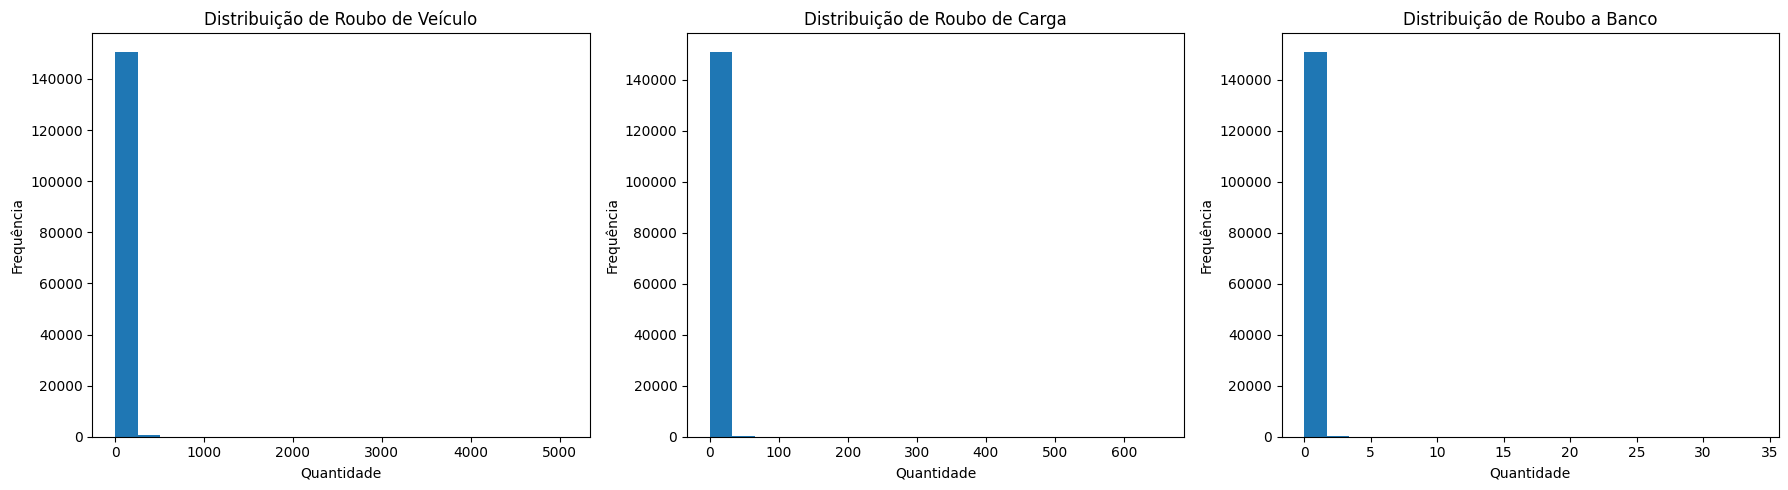

In [96]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].hist(df['roubo_de_veiculo'], bins=20)
axes[0].set_title('Distribuição de Roubo de Veículo')
axes[0].set_xlabel('Quantidade')
axes[0].set_ylabel('Frequência')

axes[1].hist(df['roubo_de_carga'], bins=20)
axes[1].set_title('Distribuição de Roubo de Carga')
axes[1].set_xlabel('Quantidade')
axes[1].set_ylabel('Frequência')

axes[2].hist(df['roubo_a_banco'], bins=20)
axes[2].set_title('Distribuição de Roubo a Banco')
axes[2].set_xlabel('Quantidade')
axes[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

<p>Os histogramas deixam evidente o grau extremo de concentração das ocorrências em valores muito baixos, especialmente em zero. A distribuição é altamente assimétrica em todos os casos, com pouquíssimos registros representando valores elevados que, apesar de raros, influenciam drasticamente a escala dos gráficos.

Esse comportamento, além de dificultar a leitura visual da variação real entre os dados mais frequentes, sugere que o uso de escalas lineares pode mascarar nuances importantes. Uma abordagem mais adequada para visualizar esses dados poderia incluir a aplicação de escalas logarítmicas ou a remoção de outliers para destacar a concentração dos valores mais comuns.

Além disso, a semelhança nas distribuições visíveis reforça o padrão de associação entre as variáveis, anteriormente indicado pelas altas correlações. Isso sugere que regiões com alta ocorrência de um tipo de roubo tendem a concentrar os outros também — ainda que visualmente a dispersão real esteja escondida pelo domínio dos valores baixos.</p>

In [100]:
grouped_stats = []

for region, group in df.groupby("regiao_ssp"):
    stats = group[colunas_selecionadas].describe().T
    stats["skewness"] = group[colunas_selecionadas].skew()
    stats["kurtosis"] = group[colunas_selecionadas].kurtosis()
    stats["regiao_ssp"] = region
    grouped_stats.append(stats.reset_index())

stats_by_region = pd.concat(grouped_stats)
stats_by_region.rename(columns={'index': 'variavel'}, inplace=True)

In [101]:
stats_by_region

,variavel,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis,regiao_ssp
0,roubo_de_veiculo,10100.00,0.17,0.78,0.00,0.00,0.00,0.00,12.00,6.84,58.13,Araçatuba
1,roubo_de_carga,10100.00,0.01,0.10,0.00,0.00,0.00,0.00,2.00,11.64,145.93,Araçatuba
2,roubo_a_banco,10100.00,0.00,0.05,0.00,0.00,0.00,0.00,2.00,25.27,705.11,Araçatuba
0,roubo_de_veiculo,17864.00,0.17,0.70,0.00,0.00,0.00,0.00,15.00,7.26,74.36,Bauru
1,roubo_de_carga,17864.00,0.03,0.19,0.00,0.00,0.00,0.00,5.00,8.32,94.99,Bauru
2,roubo_a_banco,17864.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00,21.33,453.18,Bauru
0,roubo_de_veiculo,8908.00,12.99,56.83,0.00,0.00,1.00,5.00,662.00,6.52,44.25,Campinas
1,roubo_de_carga,8908.00,0.94,3.28,0.00,0.00,0.00,0.00,38.00,5.84,40.17,Campinas
2,roubo_a_banco,8908.00,0.03,0.20,0.00,0.00,0.00,0.00,6.00,11.90,208.59,Campinas
0,roubo_de_veiculo,236.00,3026.84,874.70,828.00,2637.00,3123.00,3634.50,5082.00,-0.65,0.15,Capital


<p>As estatísticas descritivas estratificadas por regiao_ssp evidenciam grandes contrastes entre as regiões. Por exemplo, a Capital se destaca com médias extremamente elevadas para roubo de veículo e roubo de carga, além de apresentar um padrão diferente das demais, com assimetria negativa ou próxima de zero — sinalizando distribuições mais simétricas e menos concentradas em zero.

Por outro lado, regiões como Presidente Prudente, São José do Rio Preto e Araçatuba apresentam médias próximas de zero e altíssimos valores de assimetria e curtose, indicando distribuições altamente concentradas em zero, com alguns poucos valores muito elevados puxando as métricas.

Essas diferenças mostram a importância de considerar a regionalização nas análises, pois o padrão de distribuição dos crimes varia drasticamente conforme a região. Esse comportamento pode influenciar na escolha de modelos estatísticos ou políticas públicas direcionadas.</p>